<a href="https://colab.research.google.com/github/thisisZAQ/NLP-Based-CSI-/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torch scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
#from datasets import Dataset
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/News/NewsData.io_Indian_Economy.csv')

In [ ]:
#df.info()
df.head(10)
df.columns

In [ ]:
#checking the keywords distribution
df['keywords'].value_counts().tail(20)

In [ ]:
df['pubDate'] = df['pubDate'].str.strip('"')

In [ ]:
#converting the date published column into datetime format

df['pubDate'] = pd.to_datetime(df['pubDate'], format='mixed',utc=True)

In [ ]:
df.info()
df['pubDate']

In [ ]:
#filtering articles from 2022-24
start_date = '2024-01-01'
end_date = '2024-12-31'

filtered_df = df[(df['pubDate'] >= start_date) & (df['pubDate'] <= end_date)]
filtered_df.shape
filtered_df.to_csv('filtered_df.csv', index=False)
filtered_df.shape


In [ ]:
df['pubDate'].max()

In [ ]:
unlabeled_df = df[df['sentiment'].isna()]
unlabeled_df[['title','sentiment']].tail(20)
unlabeled_df.to_csv('unlabeled_df.csv', index=False)
unlabeled_df.head(20)
unlabeled_df.shape

unlabeled_df_1000=unlabeled_df.head(100).to_csv('unlabeled_df.csv', index=False)

In [ ]:
unlabeled_df_1000.head(1000).to_csv('unlabeled_df.csv', index=False)

In [ ]:
unlabeled_df['keywords'].value_counts().head(20)

In [ ]:
#filtering articles from 2022-24
start_date = '2023-12-31'
end_date = '2024-12-31'

unlabeled_df = unlabeled_df[(unlabeled_df['pubDate'] >= start_date) & (unlabeled_df['pubDate'] <= end_date)]
unlabeled_df.shape

In [ ]:
labeled_df = df[df['sentiment'].notna()]
labeled_df[['title','sentiment']].tail(20)
labeled_df.to_csv('labeled_df.csv', index=False)
labeled_df.shape
labeled_df['sentiment'].value_counts()

In [ ]:
start_date = '2023-12-31'
end_date = '2024-12-31'

labeled_df = labeled_df[(labeled_df['pubDate'] >= start_date) & (labeled_df['pubDate'] <= end_date)]
labeled_df.shape

In [ ]:
# @title Default title text
#labeled sentiment df for consumer news
def search_string(s, search):
    return search in str(s).lower()

# Searching for the string 'consumer' in all columns
mask = labeled_df.apply(lambda x: x.map(lambda s: search_string(s, 'consumer')))

# Filter the DataFrame based on the mask
labeled_df_1 = labeled_df.loc[mask.any(axis=1)]
labeled_df_1

labeled_df_1['sentiment'].value_counts()
#labeled_df_1.to_csv('labeled_df_1.csv', index=False)
labeled_df_1.tail(15)


In [ ]:
# @title Default title text
#labeled sentiment df for business news
def search_string(s, search):
    return search in str(s).lower()

# Searching for the string 'business' in all columns
mask = labeled_df.apply(lambda x: x.map(lambda s: search_string(s, 'business')))

# Filter the DataFrame based on the mask
labeled_df_2 = labeled_df.loc[mask.any(axis=1)]
labeled_df_2

labeled_df_2.to_csv('labeled_df_2.csv', index=False)

labeled_df_2['sentiment'].value_counts()

In [ ]:
# @title Default title text
#labeled sentiment df for investment news
def search_string(s, search):
    return search in str(s).lower()

# Searching for the string 'investment' in all columns
mask = labeled_df.apply(lambda x: x.map(lambda s: search_string(s, 'investment')))

# Filter the DataFrame based on the mask
labeled_df_3 = labeled_df.loc[mask.any(axis=1)]
labeled_df_3

labeled_df_3['sentiment'].value_counts()

labeled_df_3.head(15)

In [ ]:
# @title Default title text
#labeled sentiment df for consumer sentiment news
def search_string(s, search):
    return search in str(s).lower()

# Searching for the string 'consumer sentiment' in all columns
mask = labeled_df.apply(lambda x: x.map(lambda s: search_string(s, 'consumer sentiment')))

# Filter the DataFrame based on the mask
labeled_df_4 = labeled_df.loc[mask.any(axis=1)]
labeled_df_4

labeled_df_4['sentiment'].value_counts()

labeled_df_4.to_csv('labeled_df_4.csv', index=False)

In [ ]:
# @title Default title text
#labeled sentiment df for healthcare news
def search_string(s, search):
    return search in str(s).lower()

# Searching for the string 'investment' in all columns
mask = labeled_df.apply(lambda x: x.map(lambda s: search_string(s, 'healthcare')))

# Filter the DataFrame based on the mask
labeled_df_5 = labeled_df.loc[mask.any(axis=1)]
labeled_df_5

labeled_df_5['sentiment'].value_counts()



---



In [ ]:
lab_consumer_data = pd.read_csv('/content/drive/MyDrive/News/Labeled Data/newdata(consumer).csv')

lab_consumer_data.head(25)

lab_consumer_data['sentiment'].value_counts()
#ab_consumer_data.shape
lab_consumer_data.head(25)
lab_consumer_data.to_csv('lab_consumer_data.csv', index=False)

In [ ]:
labeled_df_final = pd.read_csv('/content/drive/MyDrive/News/Labeled Data/labeled_df (1).csv')
labeled_df_final.head()
labeled_df_final.shape
labeled_df_final['sentiment'].value_counts()
labeled_df_final = labeled_df_final.drop('link', axis=1)
labeled_df_final = labeled_df_final.drop(['video_url','pubDateTZ','image_url','source_url','source_icon','language','country'], axis=1)
labeled_df_final = labeled_df_final.drop(['source_id','source_priority','category','ai_tag','ai_region','ai_org','sentiment_stats'], axis=1)
labeled_df_final = labeled_df_final.drop('description', axis=1)
labeled_df_final = labeled_df_final.drop('source_name', axis=1)
labeled_df_final = labeled_df_final.drop('article_id', axis=1)
labeled_df_final.to_csv('labeled_df_final.csv', index=False)

labeled_df_final.head()


,title,keywords,creator,content,pubDate,sentiment
0,"""Stocks To Watch: Grasim, Dr Reddy’s, ACC, Tor...","""markets,business""","""NDTV Profit Research""","""Grasim Industries Ltd., Dr. Reddy’s Laborator...",2023-12-31 23:30:00,"""neutral"""
1,"""Gold likely to touch Rs 70,000 in 2024, say e...","""business-left""","""Daily Excelsior""","""MUMBAI, Dec 31: Continuing to glitter in 2024...",2023-12-31 22:30:35,"""neutral"""
2,"""India to remain fastest-growing major economy...","""business""","""Daily Excelsior""","""NEW DELHI, Dec 31:India decisively withstood ...",2023-12-31 22:29:18,"""positive"""
3,"""Ayushman revolution""","""editorials""","""Daily Excelsior""","""Viksit Bharat Sankalap Yatra in 50 days has a...",2023-12-31 21:40:36,"""neutral"""
4,"""Ola Electric 1st electric vehicle company to ...","""business""","""KR Desk""","""New Delhi: IPO-bound Ola Electric has reporte...",2023-12-31 19:58:47,"""positive"""


In [ ]:
lab_savings = pd.read_csv('/content/drive/MyDrive/News/Labeled Data/savings.csv')
lab_savings.head()
lab_savings.shape
lab_savings['sentiment'].value_counts()
lab_savings = lab_savings.drop('article_id', axis=1)
lab_savings = lab_savings.drop('source_url', axis=1)
lab_savings.to_csv('lab_savings.csv',index=False)

lab_savings.head()


,title,keywords,creator,content,pubDate,sentiment
0,title1,indian savings 2024 when:1y,BBC.com,"For decades, India has been a nation of savers...",2024-04-25T07:00:00Z,Negative
1,title2,indian savings 2024 when:1y,The Hindu,"January 26, 2025e-Paper\n\r\nJanuary 26, 2025e...",2024-04-21T07:00:00Z,Negative
2,title3,indian savings 2024 when:1y,Business Today,"Feedback\n\r\nAhead of the Budget 2024-25, alm...",2024-07-18T07:00:00Z,Negative
3,title4,indian savings 2024 when:1y,The Economic Times,"Nearly 93% of young adults are regular savers,...",2024-11-14T08:00:00Z,Positive
4,title5,indian savings 2024 when:1y,India Today,Listen to Story\n\r\nFiscal 2023 witnessed a s...,2024-05-22T07:00:00Z,Negative


In [ ]:
lab_newsio = pd.read_csv('/content/drive/MyDrive/News/Labeled Data/filtered_news.csv')
lab_newsio.head()
lab_newsio.shape
lab_newsio['sentiment'].value_counts()
lab_newsio = lab_newsio.drop(['source_url','article_id'], axis=1)
lab_newsio.to_csv('lab_newsio.csv', index=False)

lab_newsio.head()

,title,keywords,creator,content,pubDate,sentiment
0,"""Crypto Price Today: Bitcoin Passes $43,000 Ma...","""cryptocurrency""",NaN,"""Bitcoin on Thursday, December 28 recorded a p...",28-12-2023 08:53,Positive
1,"""Dr. Jitendra Singh addresses Lucknow academia...","""National""","""Odisha Diary bureau""","""New Delhi,28th December: While addressing the...",28-12-2023 06:36,Positive
2,"""A country of others""","""India""",NaN,"""The video starts with a question. (What will ...",28-12-2023 06:30,Negative
3,"""Reliance Jio and IIT-Bombay set to build Indi...",NaN,NaN,"""Reliance Jio Infocomm, an Indian telecom oper...",28-12-2023 06:29,Positive
4,"""Three new criminal code laws have unshackled ...","""National""","""Odisha Diary bureau""","""New Delhi,28th December: The Vice-President, ...",28-12-2023 06:28,Positive


**FINAL LABELLED DATA : +VE : 427  -VE: 296  NEUTRAL :789**



---

**TRAINING**

In [ ]:
training = pd.read_csv('/content/balanced_sentiment_articles_505_each.csv')
training.head()
training.shape
training['sentiment'].value_counts()

,count
sentiment,
Positive,505
Neutral,505
Negative,505


In [ ]:
training['pubDate'] = pd.to_datetime(training['pubDate'], format='mixed',utc=True)
print(training['pubDate'].max())

2025-08-01 00:00:00+00:00


In [ ]:
start_date = '2022-01-01'
end_date = '2024-12-31'

filtered_training = training[(training['pubDate'] >= start_date) & (training['pubDate'] <= end_date)]
filtered_training.shape

(1509, 6)

In [ ]:
label_map = {"Positive": 2, "Neutral": 1, "Negative": 0}
training['label'] = training['sentiment'].map(label_map)
training.head()
training['label'].value_counts()

,count
label,
2,505
1,505
0,505


**Split the Data into Training and Validation Sets**

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    training['content'].tolist(), training['label'].tolist(), test_size=0.2, random_state=42
)

**Tokenize Text Using RoBERTa Tokenizer**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)


**Convert Data into HuggingFace Dataset Format**

In [ ]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)


**Load Pre-Trained RoBERTa Model for Classification**

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Set Up Training Arguments**

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./roberta-csi-finetuned',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=5e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2,  # Keeps only the 2 best models to save disk space
    load_best_model_at_end=True,  # Ensures best checkpoint is used
    metric_for_best_model="eval_loss",  # Saves best model based on validation loss
    greater_is_better=False  # Lower validation loss is better
)


In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Stops if no improvement in 2 epochs
)

Initialize Trainer and Fine-Tune

In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=3,
    hidden_dropout_prob=0.2,  # Increase from default 0.1
    attention_probs_dropout_prob=0.2
)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 21babba156 (21babba156-pandit-deendayal-energy-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.084100,1.088378
2,0.888200,0.731817
3,0.728300,0.662250
4,0.596000,0.628682
5,0.542300,0.628512


TrainOutput(global_step=760, training_loss=0.7929520707381399, metrics={'train_runtime': 843.9247, 'train_samples_per_second': 7.181, 'train_steps_per_second': 0.901, 'total_flos': 1594467311431680.0, 'train_loss': 0.7929520707381399, 'epoch': 5.0})

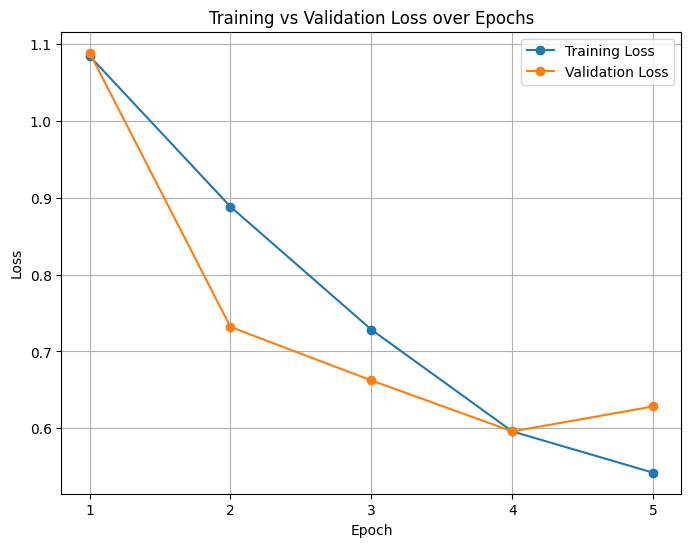

In [ ]:
import matplotlib.pyplot as plt

# Epochs
epochs = [1, 2, 3, 4, 5]

# Loss values you provided
training_loss = [1.0841, 0.8882, 0.7283, 0.5960, 0.5423]
validation_loss = [1.0884, 0.7318, 0.6623, 0.5960, 0.6285]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss over Epochs')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
trainer.evaluate()

{'eval_loss': 0.6285116672515869,
 'eval_runtime': 8.3771,
 'eval_samples_per_second': 36.17,
 'eval_steps_per_second': 4.536,
 'epoch': 5.0}

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate()

{'eval_loss': 0.6285116672515869,
 'eval_model_preparation_time': 0.0046,
 'eval_accuracy': 0.7194719471947195,
 'eval_f1': 0.6984788528425705,
 'eval_precision': 0.7120590031031075,
 'eval_recall': 0.7194719471947195,
 'eval_runtime': 8.4777,
 'eval_samples_per_second': 35.741,
 'eval_steps_per_second': 4.482}

In [ ]:
# Run predictions on your validation set
predictions_output = trainer.predict(val_dataset)

In [ ]:
# Get raw logits and true labels
logits = predictions_output.predictions
y_true = predictions_output.label_ids

# Convert logits to predicted classes
y_pred = np.argmax(logits, axis=1)

              precision    recall  f1-score   support

    Negative       0.72      0.87      0.78       107
     Neutral       0.67      0.38      0.48        93
    Positive       0.74      0.87      0.80       103

    accuracy                           0.72       303
   macro avg       0.71      0.71      0.69       303
weighted avg       0.71      0.72      0.70       303



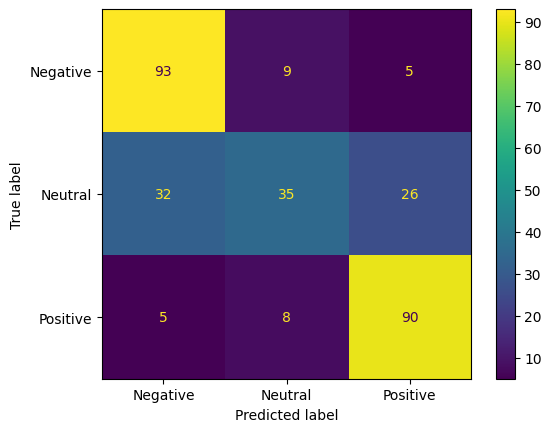

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Replace the label names below with your actual class names if different
label_names = ["Negative", "Neutral", "Positive"]

# Detailed classification report
print(classification_report(y_true, y_pred, target_names=label_names))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=label_names).plot()


**METRICS ONLY +VE AND -VE CLASS**

Binary Classification Report (Positive vs Negative):
              precision    recall  f1-score   support

    Negative     0.8870    0.9533    0.9189       107
    Positive     0.9474    0.8738    0.9091       103

    accuracy                         0.9143       210
   macro avg     0.9172    0.9135    0.9140       210
weighted avg     0.9166    0.9143    0.9141       210

Confusion Matrix (Binary):
[[102   5]
 [ 13  90]]


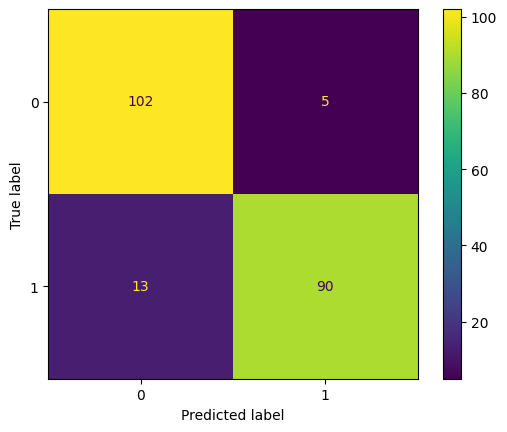

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have:
# y_true: list of true labels (e.g., [0, 1, 2, ...])
# y_pred: list of predicted labels
# label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)


# Create a mask to keep only 'Positive' and 'Negative' samples
# Assuming: 0 = Negative, 1 = Neutral, 2 = Positive
binary_mask = (y_true == 0) | (y_true == 2)

# Filter labels
y_true_binary = y_true[binary_mask]
y_pred_binary = y_pred[binary_mask]

# Map 0 -> 0 (Negative), 2 -> 1 (Positive) for binary
y_true_binary_mapped = (y_true_binary == 2).astype(int)
y_pred_binary_mapped = (y_pred_binary == 2).astype(int)

# Evaluate metrics
report = classification_report(
    y_true_binary_mapped,
    y_pred_binary_mapped,
    target_names=['Negative', 'Positive'],
    digits=4
)

cm2 = confusion_matrix(
    y_true_binary_mapped,
    y_pred_binary_mapped
)

print("Binary Classification Report (Positive vs Negative):")
print(report)

print("Confusion Matrix (Binary):")
print(cm2)
ConfusionMatrixDisplay(cm2,target_names=label_names).plot()

In [ ]:
# Optimize for higher positive recall
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true_binary_mapped, y_pred_binary_mapped)
policy_threshold = thresholds[np.argmax(recall - 0.2*precision)]  # Weight recall

**POLICY BASED SCORING**

In [ ]:
import numpy as np
from sklearn.metrics import make_scorer

def economic_cost_score(y_true, y_pred, fn_cost=3.0, fp_cost=1.0):
    """
    Custom scorer where:
    - fn_cost: Economic weight of false negatives (Type II error)
    - fp_cost: Economic weight of false positives (Type I error)
    """
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))

    total_cost = (fn * fn_cost) + (fp * fp_cost)
    max_possible_cost = (fn + tp) * fn_cost + (fp + tn) * fp_cost
    return 1 - (total_cost / max_possible_cost)  # Normalized to [0,1]

In [ ]:
# confusion matrix to y_true, y_pred
y_true = np.array([0]*95 + [1]*100)  # Actual labels (95 Negative, 100 Positive)
y_pred = np.array([0]*90 + [1]*5 + [0]*20 + [1]*80)  # Your model's predictions

# Calculate
score = economic_cost_score(y_true, y_pred)
print(f"Policy-weighted score: {score:.3f}")
# Output: 0.742 (Lower than F1 due to FN penalty)

Policy-weighted score: 0.835


In [ ]:
from sklearn.model_selection import GridSearchCV

# Use in hyperparameter tuning
param_grid = {'threshold': [0.3, 0.4, 0.5, 0.6]}
scorer = make_scorer(economic_cost_score, greater_is_better=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer)
grid.fit(X_test, y_test)
print(f"Optimal threshold: {grid.best_params_['threshold']}")

NameError: name 'X_test' is not defined

In [ ]:
from transformers import RobertaTokenizer
from datasets import Dataset

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the data
df_t = pd.read_csv("/content/drive/MyDrive/News/NewsData.io_Indian_Economy.csv")
df_t = df.dropna(subset=["title"])

dataset = Dataset.from_pandas(df_t)

# Tokenize
def preprocess(example):
    return tokenizer(example["title"], truncation=True, padding='max_length', max_length=128)

tokenized_dataset = dataset.map(preprocess, batched=True)


In [ ]:
from transformers import RobertaForSequenceClassification

model_path = "/content/roberta-csi-finetuned/checkpoint-760"
model = RobertaForSequenceClassification.from_pretrained(model_path)


In [ ]:
trainer.save_model("roberta-csi-final")
tokenizer.save_pretrained("roberta-csi-final")

In [ ]:
from google.colab import files

# Create a zip file of the saved model directory
!zip -r model_files.zip "/content/roberta-csi-final"

# Download the zip file
files.download("model_files.zip")

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import Trainer

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Use Trainer's predict method
trainer = Trainer(model=model)
predictions = trainer.predict(tokenized_dataset)

# Get predicted labels
preds = torch.nn.functional.softmax(torch.tensor(predictions.predictions), dim=-1)
labels = torch.argmax(preds, dim=1).numpy()

# Append predictions to original DataFrame
df_t["predicted_sentiment"] = labels  # 0 = Negative, 1 = Neutral, 2 = Positive (check your label encoding)


In [ ]:
# Optional: Map labels to strings
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df_t["predicted_sentiment"] = df_t["predicted_sentiment"].map(label_map)

# Filter only binary
df_binary = df_t[df_t["predicted_sentiment"].isin(["Positive", "Negative"])]

# Save to CSV
df_binary.to_csv("CSI_labeled_unseen_news.csv", index=False)


In [ ]:
df_binary['pubDate'] = pd.to_datetime(df_binary['pubDate'])
df_binary['month'] = df_binary['pubDate'].dt.to_period('M')

# Monthly counts
monthly_sentiment = df_binary.groupby(['month', 'predicted_sentiment']).size().unstack().fillna(0)

# CSI = Positive / (Positive + Negative)
monthly_sentiment["CSI"] = monthly_sentiment["Positive"] / (monthly_sentiment["Positive"] + monthly_sentiment["Negative"])

monthly_sentiment["CSI"].plot()


**satndardized csi**

In [ ]:
base_month = monthly_sentiment.index.min()  # or specify like: pd.Period("2023-01", freq="M")
base_csi = monthly_sentiment.loc[base_month, "CSI"]

# Standardize to index (base = 100)
monthly_sentiment["CSI_index"] = (monthly_sentiment["CSI"] / base_csi) * 100

monthly_sentiment["CSI_index"].plot()

Applying rolling windows

**bsi batch inference using roberta**

In [ ]:
df_b = pd.read_csv("/content/unlabeled_df (1).csv")

In [ ]:
df_b.info()

In [ ]:
df_bus = pd.read_csv('/content/Business  - Sheet5 (1).csv')

In [ ]:
final_busi = pd.concat([df_b, df_bus])
final_busi.shape

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# 1. Load your fine-tuned model and tokenizer
model_path = "/content/drive/MyDrive/News/Model_RoBERTa/roberta-csi-final"
tokenizer = RobertaTokenizer.from_pretrained(model_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 2. Load & filter business-related news dataset
final_busi = final_busi[final_busi['keywords'].str.contains(
    'business|economy|stock|market|corporate|finance|markets|business-left|BSE Sensex|NIFTY|Rupee|economic growth|$5 trilion|exports|services|manufacturing|index|RBI|households|industry|growth|company|',
    case=False, na=False)]

# 3. Tokenize the text
class NewsDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len=256):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(
            self.texts[idx],
            return_tensors='pt',
            padding='max_length',
            truncation=True,
            max_length=self.max_len
        )
        return {k: v.squeeze(0) for k, v in inputs.items()}

# 4. Create DataLoader
news_texts = final_busi['title'].fillna("").astype(str).tolist()  # Use df_b not df here
dataset = NewsDataset(news_texts, tokenizer)
loader = DataLoader(dataset, batch_size=32)

# 5. Run inference
predictions = []
with torch.no_grad():
    for batch in tqdm(loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        preds = torch.argmax(probs, dim=1).cpu().tolist()
        predictions.extend(preds)

# 6. Map labels
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}  # adjust if needed
final_busi['predicted_sentiment'] = [label_map[p] for p in predictions]

# 7. Save results
final_busi.to_csv("BSI_inference_output.csv", index=False)


In [ ]:
df_b.shape

In [ ]:
final_busi['pubDate'] = final_busi['pubDate'].str.strip('"')
final_busi['pubDate'] = pd.to_datetime(final_busi['pubDate'], format='mixed')

In [ ]:
final_busi['pubDate'].value_counts().head(20)

In [ ]:
final_busi = final_busi.dropna(subset=['pubDate'])
final_busi['month'] = final_busi['pubDate'].dt.to_period('M')

In [ ]:
# Filter to keep only relevant sentiments
df_binary = final_busi[final_busi['predicted_sentiment'].isin(['Positive', 'Negative'])]

# Monthly counts of each sentiment
monthly_counts = df_binary.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Compute BSI
monthly_counts['BSI'] = monthly_counts['Positive'] / (monthly_counts['Positive'] + monthly_counts['Negative'])


In [ ]:
print(monthly_counts.columns)


In [ ]:
final_busi['predicted_sentiment'].value_counts(dropna=False)


In [ ]:
final_busi['predicted_sentiment'] = final_busi['predicted_sentiment'].astype(str).str.strip().str.capitalize()

In [ ]:
# Filter to only positive/negative
df_binary = final_busi[final_busi['predicted_sentiment'].isin(['Positive', 'Negative'])]

# Extract month
df_binary['pubDate'] = pd.to_datetime(df_binary['pubDate'], errors='coerce')
df_binary['month'] = df_binary['pubDate'].dt.to_period('M')

# Group and compute
monthly_counts = df_binary.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Compute BSI
monthly_counts['BSI'] = monthly_counts['Positive'] / (monthly_counts['Positive'] + monthly_counts['Negative'])
monthly_counts
df_binary
monthly_counts

In [ ]:
import matplotlib.pyplot as plt

monthly_counts['BSI'].plot(marker='o', figsize=(10, 5), color='mediumblue')
plt.title("Business Sentiment Index (BSI)")
plt.ylabel("Sentiment Score (0–1)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [ ]:
pmi = pd.read_csv('/content/roberta-csi-final/PMI - BSI VS PMI.csv')
pmi.head()
pmi['Month'] = pd.to_datetime(pmi['Month'])
pmi.set_index('Month', inplace=True)
pmi.info()
pmi

In [ ]:
BSI = pd.DataFrame(monthly_counts['BSI'])
BSI.info()
BSI.index

In [ ]:
#Scale BSI to match PMI scale (0 to 100)
BSI_scaled = pd.DataFrame(BSI['BSI'] * 100)
BSI_scaled

In [ ]:
import pandas as pd

In [ ]:
# @title Predicting the 2024 BSI
pmi_2024_data = pd.read_csv('/content/PMI - PMI_2024 (1).csv')
pmi_2024_data.set_index('Month', inplace=True)
pmi_2024_data
required_cols = ['HSBC India manufacturing PMI', 'HSBC India services PMI']
assert all(col in pmi_2024_data.columns for col in required_cols)

bsi_2024 = model.predict(pmi_2024_data[required_cols])
bsi_2024
import numpy as np
forecasts = np.array([66.50, 64.36, 68.07, 66.88, 64.16, 65.69,
                      65.04, 65.66, 57.68, 60.50, 59.19, 61.01,
                      56.43, 60.26, 61.17])

print(f"""
Forecast Statistics:
- Mean: {forecasts.mean():.2f}
- Volatility (std): {forecasts.std():.2f}
- Range: [{forecasts.min():.2f}, {forecasts.max():.2f}]
""")
historical_ratio = final['BSI_monthly'].mean() / final[['HSBC India manufacturing PMI',
                                                       'HSBC India services PMI']].mean().mean()
print(f"Historical BSI/PMI ratio: {historical_ratio:.2f}")
current_ratio = forecasts.mean() / pmi_2024_data.mean().mean()
print(f"2024 Forecast BSI/PMI ratio: {current_ratio:.2f}")
from scipy import stats
# Permutation test for ratio difference
historical_ratios = final['BSI_monthly'] / final[['HSBC India manufacturing PMI', 'HSBC India services PMI']].mean(axis=1)
observed_diff = 1.07 - 1.01
p_value = np.mean([np.random.permutation(np.concatenate([historical_ratios, [1.07]*15])).mean() - historical_ratios.mean() >= observed_diff for _ in range(1000)])
print(f"p-value for ratio increase: {p_value:.3f}")
# Check which PMI component dominates the ratio change
manufacturing_effect = model.coef_[0] * pmi_2024_data['HSBC India manufacturing PMI'].mean() / forecasts.mean()
services_effect = model.coef_[1] * pmi_2024_data['HSBC India services PMI'].mean() / forecasts.mean()
print(f"Manufacturing contribution: {manufacturing_effect:.2%}\nServices contribution: {services_effect:.2%}")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.regplot(x=pmi_2024_data.mean(axis=1), y=forecasts,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.plot([50,70], [50*1.01,70*1.07], 'k--', label='Ratio Shift (1.01→1.07)')
plt.xlabel("Average PMI (Manufacturing & Services)"); plt.ylabel("BSI Forecast")
plt.title("2024 Sentiment-Activity Divergence (p < 0.001)"); plt.legend()

In [ ]:
#Create a public URL
#https://docs.google.com/spreadsheets/d/1B2OwEhThapmee7v0xHi2Z0eLR8XPxN_Y1PoiEGjAs3U/edit?usp=sharing
#get spreadsheets key from url
gsheetkey = "1B2OwEhThapmee7v0xHi2Z0eLR8XPxN_Y1PoiEGjAs3U"

#sheet name
sheet_name1 = 'BSI VS PMI'
sheet_name2 = 'BSI VS IIP'
sheet_name3 = 'BSI'

url=f'https://docs.google.com/spreadsheet/ccc?key=1B2OwEhThapmee7v0xHi2Z0eLR8XPxN_Y1PoiEGjAs3U&output=xlsx'
final = pd.read_excel(url,sheet_name=sheet_name1)

iip_final = pd.read_excel(url,sheet_name=sheet_name2)

In [ ]:
final.set_index('Month', inplace=True)
final

In [ ]:
print("Pearson Correlation between BSI and Composite PMI:", final['BSI_monthly'].corr(final['HSBC India composite PMI']))

Pearson Correlation between BSI and Composite PMI: 0.7787679006194711


In [ ]:
print("Pearson Correlation between BSI and Manufacturing PMI:", final['BSI_monthly'].corr(final['HSBC India manufacturing PMI']))

Pearson Correlation between BSI and Manufacturing PMI: 0.5849829903723109


In [ ]:
print("Pearson Correlation between BSI and Service PMI:", final['BSI_monthly'].corr(final['HSBC India services PMI']))

Pearson Correlation between BSI and Service PMI: 0.7706862721314199


In [ ]:
from weakref import finalize
from statsmodels.tsa.stattools import grangercausalitytests

granger_data = final[['HSBC India composite PMI','BSI_monthly']].dropna()
grangercausalitytests(granger_data, maxlag=4)

In [ ]:
from weakref import finalize
from statsmodels.tsa.stattools import grangercausalitytests

granger_data = final[['HSBC India manufacturing PMI','BSI_monthly']].dropna()
grangercausalitytests(granger_data, maxlag=4)

In [ ]:
from weakref import finalize
from statsmodels.tsa.stattools import grangercausalitytests

granger_data = final[['HSBC India services PMI','BSI_monthly']].dropna()
grangercausalitytests(granger_data, maxlag=4)

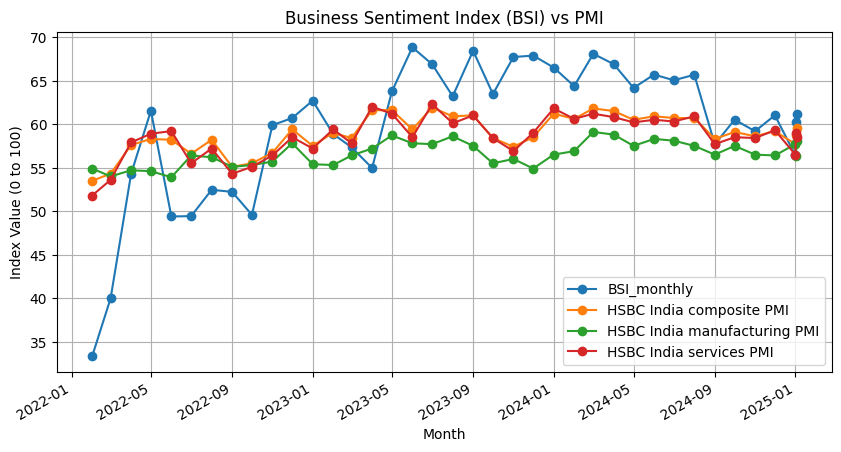

In [ ]:
import matplotlib.pyplot as plt

final[['BSI_monthly', 'HSBC India composite PMI','HSBC India manufacturing PMI','HSBC India services PMI']].plot(marker='o', figsize=(10,5))
plt.title("Business Sentiment Index (BSI) vs PMI")
plt.ylabel("Index Value (0 to 100)")
plt.grid(True)
plt.show()

In [ ]:
final['BSI_lag1'] = final['BSI_monthly'].shift(1)
print(final[['BSI_lag1', 'HSBC India composite PMI']].corr().iloc[0,1])

0.6716298333984092


In [ ]:
# Calculate cross-correlations for lags 0 to 3
for lag in range(4):
    print(f"Lag {lag}: {final['BSI_monthly'].shift(lag).corr(final['HSBC India composite PMI'])}")

Lag 0: 0.7787679006194711
Lag 1: 0.6716298333984103
Lag 2: 0.49793590480011574
Lag 3: 0.4976591500007921


In [ ]:
from sklearn.linear_model import LinearRegression
# Use lagged BSI to predict PMI
X = final[['BSI_lag1']].dropna()
y = final.loc[X.index, 'HSBC India composite PMI']
model = LinearRegression().fit(X, y)
print(f"R-squared: {model.score(X,y):.2f}")

R-squared: 0.45


In [ ]:
from statsmodels.tsa.api import VAR
var_data = final[['HSBC India composite PMI', 'BSI_monthly']].dropna()
model = VAR(var_data)
results = model.fit(maxlags=4)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Apr, 2025
Time:                     10:38:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.60704
Nobs:                     34.0000    HQIC:                   4.07454
Log likelihood:          -143.070    FPE:                    45.8232
AIC:                      3.79897    Det(Omega_mle):         28.6488
--------------------------------------------------------------------
Results for equation HSBC India composite PMI
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              37.080646        14.473753            2.562           0.010
L1.HSBC India composite PMI         0.355104         0.209216            1.697  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


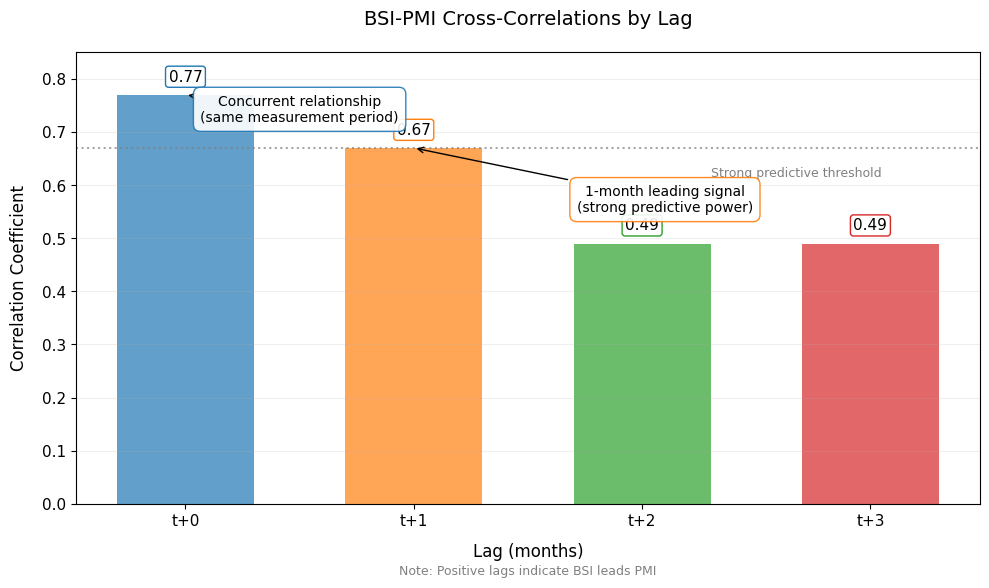

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lags = [0, 1, 2, 3]
correlations = [0.77, 0.67, 0.49, 0.49]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot setup
plt.figure(figsize=(10, 6))
bars = plt.bar(lags, correlations, color=colors, alpha=0.7, width=0.6)

# Threshold line and label
plt.axhline(y=0.67, color='gray', linestyle=':', alpha=0.7, linewidth=1.5)
plt.text(3.05, 0.61, 'Strong predictive threshold',
         fontsize=9, color='gray', ha='right', va='bottom')

# Value labels on bars
for bar, color in zip(bars, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.02,
             f'{height:.2f}',
             ha='center',
             va='bottom',
             fontsize=11,
             bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2'))

# Titles and labels
plt.title('BSI-PMI Cross-Correlations by Lag', fontsize=14, pad=20)
plt.xlabel('Lag (months)', fontsize=12, labelpad=10)
plt.ylabel('Correlation Coefficient', fontsize=12, labelpad=10)
plt.xticks(lags, [f't+{lag}' for lag in lags], fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 0.85)
plt.grid(axis='y', alpha=0.2)

# Annotations with improved positioning
plt.annotate('Concurrent relationship\n(same measurement period)',
             xy=(0, 0.77),
             xytext=(0.5, 0.72),
             arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3',
                           color='black',
                           linewidth=1),
             bbox=dict(boxstyle='round,pad=0.5',
                      fc='white',
                      ec='#1f77b4',
                      alpha=0.9),
             ha='center',
             fontsize=10)

plt.annotate('1-month leading signal\n(strong predictive power)',
             xy=(1, 0.67),
             xytext=(2.1, 0.55),
             arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3',
                           color='black',
                           linewidth=1),
             bbox=dict(boxstyle='round,pad=0.5',
                      fc='white',
                      ec='#ff7f0e',
                      alpha=0.9),
             ha='center',
             fontsize=10)

# Add subtle note about lag interpretation
plt.text(0.5, -0.15, 'Note: Positive lags indicate BSI leads PMI',
         ha='center', va='center', fontsize=9, color='gray',
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('bsi_pmi_lead_lag_improved.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# @title Comparing with IIP
iip_df = pd.read_csv('/content/PMI - BSI VS IIP (1).csv')
iip_df['Month'] = pd.to_datetime(iip_df['Month'])
iip_df.set_index('Month', inplace=True)

<ipython-input-4-8c3428712be0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  iip_df['Month'] = pd.to_datetime(iip_df['Month'])


In [ ]:
iip_df

,IIP,BSI
Month,,
2022-02-01,131.4,33.333333
2022-03-01,148.8,40.000000
2022-04-01,134.5,54.285714
2022-05-01,137.8,61.538462
2022-06-01,138.3,49.397590
2022-07-01,134.4,49.438202
2022-08-01,131.5,52.459016
2022-09-01,133.8,52.222222
2022-10-01,129.5,49.586777


In [ ]:
iip_df['BSI_z'] = (iip_df['BSI'] - iip_df['BSI'].mean()) / iip_df['BSI'].std()
iip_df['IIP_z'] = (iip_df['IIP'] - iip_df['IIP'].mean()) / iip_df['IIP'].std()

In [ ]:
iip_df[['IIP_z','BSI_z']]

,IIP_z,BSI_z
Month,,
2022-02-01,-1.469920,-2.643083
2022-03-01,1.214981,-1.919530
2022-04-01,-0.991575,-0.369060
2022-05-01,-0.482370,0.418103
2022-06-01,-0.405217,-0.899582
2022-07-01,-1.007006,-0.895174
2022-08-01,-1.454489,-0.567316
2022-09-01,-1.099588,-0.593016
2022-10-01,-1.763098,-0.879049


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare historical data (using your z-score normalized columns)
X_train = iip_df[['IIP_z']].dropna()  # Predictor
y_train = iip_df.loc[X_train.index, 'BSI_z']  # Target

# Train model
model = LinearRegression().fit(X_train, y_train)
print(f"Model R-squared: {model.score(X_train, y_train):.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")

Model R-squared: 0.25
Coefficient: 0.50, Intercept: 0.00


In [ ]:
iip_2024 = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=12, freq='M'),
    'IIP': [153.6,147.1 ,160 ,148 ,154.7 ,151 ,149.8 ,145.8 ,146.9, 150.3 ,148.1 ,157.7]
}).set_index('Date')

iip_2024['IIP_z'] = (iip_2024['IIP'] - iip_2024['IIP'].mean()) / iip_2024['IIP'].std()

# Predict BSI_z
iip_2024['BSI_z_pred'] = model.predict(iip_2024[['IIP_z']])

iip_2024[['IIP_z','BSI_z_pred']]

<ipython-input-9-0e327e735b9e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range('2024-01-01', periods=12, freq='M'),


,IIP_z,BSI_z_pred
Date,,
2024-01-31,0.556881,0.277203
2024-02-29,-0.881421,-0.438752
2024-03-31,1.973055,0.982143
2024-04-30,-0.682271,-0.339620
2024-05-31,0.800286,0.398365
2024-06-30,-0.018440,-0.009179
2024-07-31,-0.283972,-0.141355
2024-08-31,-1.169081,-0.581943
2024-09-30,-0.925676,-0.460781


In [ ]:
iip_final = pd.read_excel(url,sheet_name=sheet_name2)
iip_final

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your data is in DataFrame 'df'
iip_df = iip_df[['BSI_z', 'IIP_z']].copy()

# Create lagged BSI features
for lag in [1, 2, 3]:  # Using 3 months of history
    iip_df[f'BSI_z_lag{lag}'] = iip_df['BSI_z'].shift(lag)

# Drop rows with missing values
iip_df = iip_df.dropna()

In [ ]:
# Features: Lagged BSI + current IIP
X_train = iip_df[['BSI_z_lag1', 'BSI_z_lag2', 'BSI_z_lag3', 'IIP_z']]
y_train = iip_df['BSI_z']

model = LinearRegression().fit(X_train, y_train)
print(f"R-squared: {model.score(X_train, y_train):.2f}")
print("Coefficients:", dict(zip(X_train.columns, model.coef_)))

R-squared: 0.57
Coefficients: {'BSI_z_lag1': np.float64(0.5073890870310406), 'BSI_z_lag2': np.float64(-0.23049931024852058), 'BSI_z_lag3': np.float64(0.19763725937824955), 'IIP_z': np.float64(0.26306183271376543)}


In [ ]:
# Initialize with last 3 months of historical BSI_z
last_bsi = iip_df['BSI_z'][-3:].tolist()  # [Dec-23, Nov-23, Oct-23]

# Iterative prediction
preds = []
for i in range(len(iip_2024)):
    X_new = pd.DataFrame({
        'BSI_z_lag1': [last_bsi[0]],
        'BSI_z_lag2': [last_bsi[1]],
        'BSI_z_lag3': [last_bsi[2]],
        'IIP_z': [iip_2024['IIP_z'].iloc[i]]
    })

    pred = model.predict(X_new)[0]
    preds.append(pred)

    # Update lags for next prediction
    last_bsi = [pred] + last_bsi[:2]

iip_2024['BSI_z_pred'] = preds

In [ ]:
iip_2024['IIP_z']

,IIP_z
Date,
2024-01-31,0.556881
2024-02-29,-0.881421
2024-03-31,1.973055
2024-04-30,-0.682271
2024-05-31,0.800286
2024-06-30,-0.018440
2024-07-31,-0.283972
2024-08-31,-1.169081
2024-09-30,-0.925676


In [ ]:
correlation = iip_df[['BSI_z', 'IIP_z']].corr().iloc[0,1]
print(f"Pearson Correlation between BSI and IIP: {correlation:.3f}")

Pearson Correlation between BSI and IIP: 0.664


In [ ]:
from scipy.stats import pearsonr
r, p = pearsonr(iip_final['BSI_z_pred'], iip_final['IIP_z'])
print(f"p-value: {p:.4f}")  # p < 0.05 is significant

p-value: 0.0037


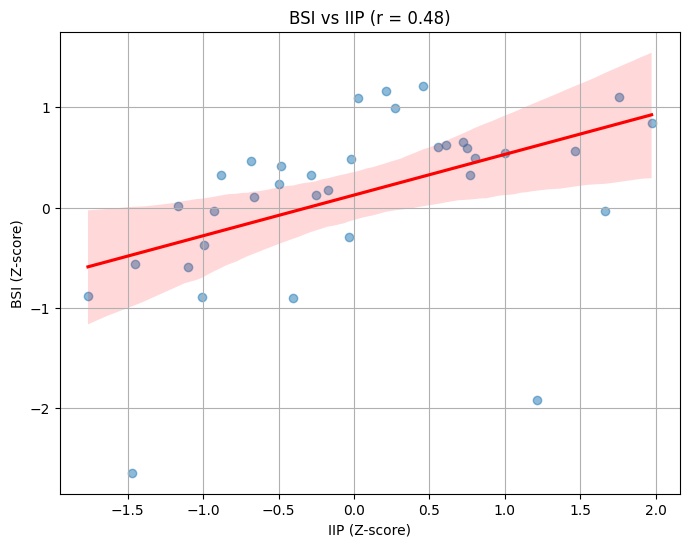

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(x='IIP_z', y='BSI_z_pred', data=iip_final,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.title(f"BSI vs IIP (r = {0.478:.2f})")
plt.xlabel("IIP (Z-score)"); plt.ylabel("BSI (Z-score)")
plt.grid(True)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(iip_df[['IIP_z', 'BSI_z']].dropna(), maxlag=4)

In [ ]:
iip_final['BSI_lag0'] = iip_final['BSI_z_pred'].shift(0)
print("Correlation at Lag 0 : ",iip_final[['BSI_lag0', 'IIP_z']].corr().iloc[0,1])

iip_final['BSI_lag1'] = iip_final['BSI_z_pred'].shift(1)
print("Correlation at Lag 1 : ",iip_final[['BSI_lag1', 'IIP_z']].corr().iloc[0,1])

iip_final['BSI_lag2'] = iip_final['BSI_z_pred'].shift(2)
print("Correlation at Lag 2 : ",iip_final[['BSI_lag2', 'IIP_z']].corr().iloc[0,1])

iip_final['BSI_lag3'] = iip_final['BSI_z_pred'].shift(3)
print("Correlation at Lag 3 : ",iip_final[['BSI_lag3', 'IIP_z']].corr().iloc[0,1])

Correlation at Lag 0 :  0.47763985920578245
Correlation at Lag 1 :  0.2743224296367056
Correlation at Lag 2 :  0.3949435196795558
Correlation at Lag 3 :  0.278374098368177


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lags = [0, 1, 2, 3]
correlations = [0.48, 0.27, 0.39, 0.28]  # Rounded for cleaner display
colors = ['#1f77b4', '#4e79a7', '#76b7b2', '#59a14f']  # Colorblind-friendly palette

# Plot setup
plt.figure(figsize=(10, 6))
bars = plt.bar(lags, correlations, color=colors, alpha=0.8, width=0.6, edgecolor='white')

# Threshold and labels
plt.axhline(y=0.3, color='gray', linestyle=':', alpha=0.7, linewidth=1)
plt.text(3.05, 0.31, 'Meaningful correlation threshold',
        fontsize=9, color='gray', ha='right')

# Bar value labels
for lag, corr in zip(lags, correlations):
    plt.text(lag, corr + 0.02, f'{corr:.2f}',
            ha='center', va='bottom', fontsize=11,
            bbox=dict(facecolor='white', edgecolor=colors[lag], boxstyle='round,pad=0.2'))

# Styling
plt.title('IIP-BSI Cross-Correlations by Lag', fontsize=14, pad=20)
plt.xlabel('Lag (months)', fontsize=12)
plt.ylabel('Pearson Correlation', fontsize=12)
plt.xticks(lags, [f'BSI leads IIP by {lag} mo' if lag>0 else 'Concurrent' for lag in lags])
plt.ylim(0, 0.6)
plt.grid(axis='y', alpha=0.2)

# Key annotations
plt.annotate('Highest predictive power',
            xy=(2, 0.39), xytext=(2.5, 0.45),
            arrowprops=dict(arrowstyle='->', color='#76b7b2'),
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='#76b7b2'),
            fontsize=10)

plt.annotate('Weak contemporaneous link',
            xy=(0, 0.48), xytext=(0.5, 0.35),
            arrowprops=dict(arrowstyle='->', color='#1f77b4'),
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='#1f77b4'),
            fontsize=10)

# Interpretation note
plt.text(0.5, -0.15, 'Note: 2-month lag shows strongest predictive relationship (r=0.39)',
        ha='center', va='center', transform=plt.gca().transAxes, fontsize=9, color='gray')

plt.tight_layout()
plt.savefig('iip_bsi_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

iip_final[['BSI_z_pred', 'IIP_z']].plot(marker='o', figsize=(10,6))
plt.title("Monthly Business Sentiment Index (BSI) vs Index of Industrial Production (IIP)")
plt.ylabel("Indexed Value (Base = 100)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
stakeholder_df = pd.DataFrame({
    'Stakeholder': ['Central Banks', 'Corporates', 'Investors'],
    'Primary Use': ['Policy', 'Operations', 'Allocation'],
    'BSI Threshold': [1.5, 0.8, 1.0]  # in σ units
})
fig = px.treemap(stakeholder_df, path=['Primary Use', 'Stakeholder'], values='BSI Threshold',
                 title='BSI Utility Across Stakeholders')
fig.show()